## Revenue Decomposition: Price vs Volume Effects
Understanding whether revenue changes are driven by pricing, demand volume, or a combination of both.

#Objective

Answer business questions:

1- How much of revenue growth is driven by price vs volume?

2- Is growth sustainable (volume-led) or fragile (price-led)?

3- What does this imply for pricing strategy?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load data
df = pd.read_excel(
    "online_retail_raw.xlsx",
    parse_dates=["InvoiceDate"]
)

# Basic cleaning
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
monthly = (
    df
    .set_index("InvoiceDate")
    .resample("M")
    .agg({
        "Quantity": "sum",
        "Revenue": "sum"
    })
)

# Average price proxy
monthly["Avg_Price"] = monthly["Revenue"] / monthly["Quantity"]

monthly.head()


/tmp/ipython-input-75819825.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,Quantity,Revenue,Avg_Price
InvoiceDate,,,
2010-12-31,359239,823746.140,2.293031
2011-01-31,387785,691364.560,1.782855
2011-02-28,283555,523631.890,1.846668
2011-03-31,377526,717639.360,1.900900
2011-04-30,308815,537808.621,1.741524


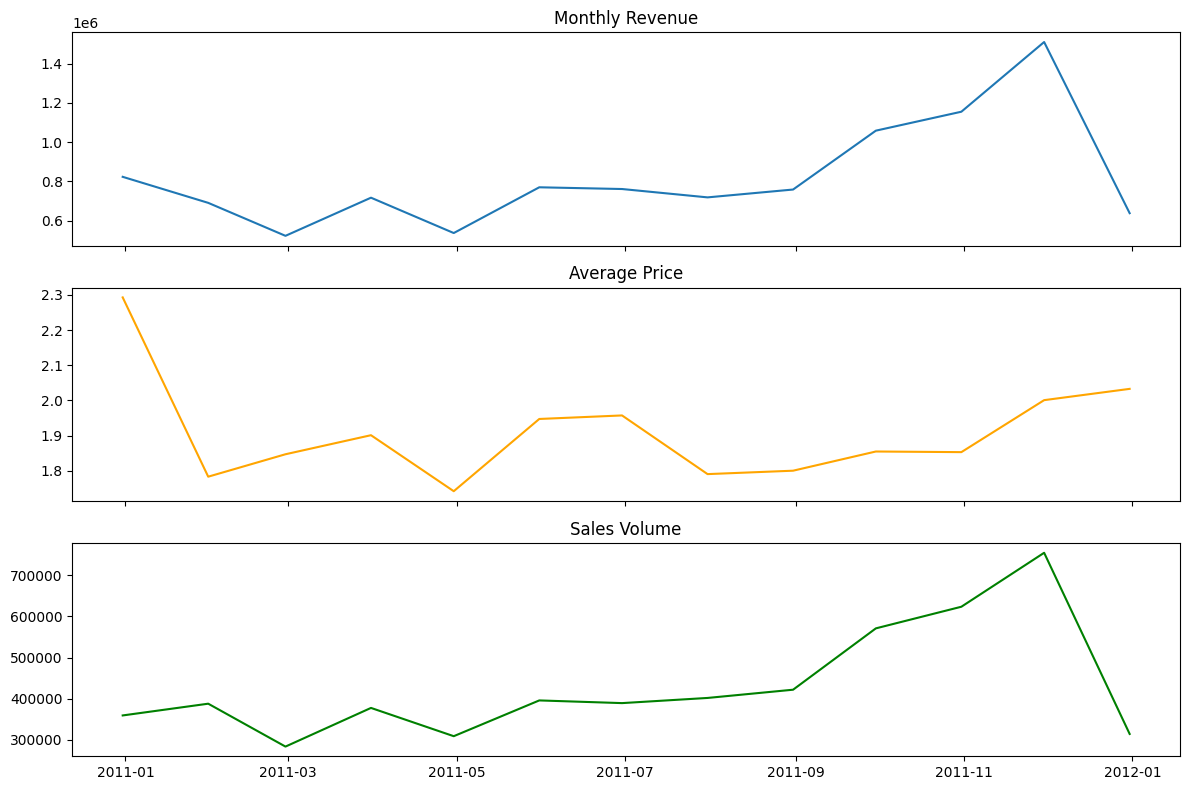

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,8), sharex=True)

ax[0].plot(monthly.index, monthly["Revenue"])
ax[0].set_title("Monthly Revenue")

ax[1].plot(monthly.index, monthly["Avg_Price"], color="orange")
ax[1].set_title("Average Price")

ax[2].plot(monthly.index, monthly["Quantity"], color="green")
ax[2].set_title("Sales Volume")

plt.tight_layout()
plt.show()


#Monthly Revenue, Price, and Volume Trends — Key Insights

Monthly revenue shows notable volatility with a strong uplift toward year-end, followed by a sharp decline in January. Average prices remain relatively stable over time, while sales volume exhibits larger fluctuations, indicating that revenue movements are primarily volume-driven rather than price-driven.

In [ ]:
monthly["Revenue_Change"] = monthly["Revenue"].diff()
monthly["Price_Change"] = monthly["Avg_Price"].diff()
monthly["Volume_Change"] = monthly["Quantity"].diff()

monthly["Price_Effect"] = monthly["Price_Change"] * monthly["Quantity"].shift(1)
monthly["Volume_Effect"] = monthly["Volume_Change"] * monthly["Avg_Price"].shift(1)

monthly[[
    "Revenue_Change",
    "Price_Effect",
    "Volume_Effect"
]].dropna().head()


,Revenue_Change,Price_Effect,Volume_Effect
InvoiceDate,,,
2011-01-31,-132381.580,-183274.968681,65456.861066
2011-02-28,-167732.670,24745.515519,-185827.012620
2011-03-31,194007.470,15377.949653,173533.220487
2011-04-30,-179830.739,-60168.908592,-130612.773862
2011-05-31,232727.399,63480.820540,151378.458829


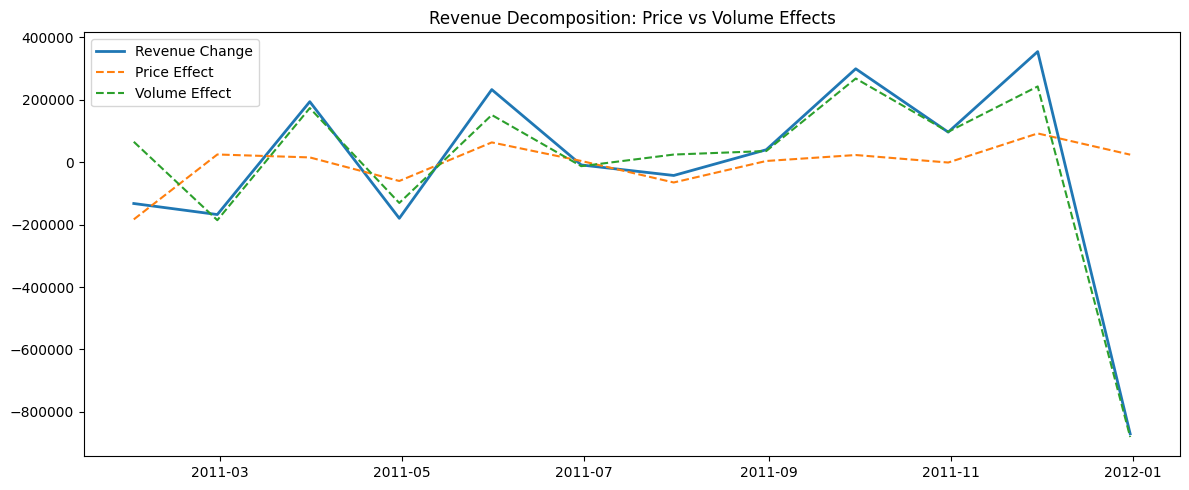

/content/images/revenue_decomposition.png

In [ ]:
import os
import matplotlib.pyplot as plt
from IPython.display import FileLink

# Create folder
os.makedirs("images", exist_ok=True)

file_path = "images/revenue_decomposition.png"

# Create figure explicitly
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(monthly.index, monthly["Revenue_Change"], label="Revenue Change", linewidth=2)
ax.plot(monthly.index, monthly["Price_Effect"], label="Price Effect", linestyle="--")
ax.plot(monthly.index, monthly["Volume_Effect"], label="Volume Effect", linestyle="--")

ax.set_title("Revenue Decomposition: Price vs Volume Effects")
ax.legend()
fig.tight_layout()

# Save AFTER plotting
fig.savefig(file_path, dpi=300, bbox_inches="tight", facecolor="white")

plt.show()
plt.close(fig)

# Download link (click this)
FileLink(file_path)


#Revenue Change Decomposition — Price vs Volume Effects

The decomposition shows that sales volume is the dominant driver of revenue changes across most months. Price effects are generally smaller and smoother, acting as a secondary stabilising factor. Large revenue swings—both gains and losses—are largely explained by shifts in demand rather than pricing adjustments.

# Business Interpretation

This pattern suggests that revenue risk and growth opportunities are more sensitive to demand dynamics than pricing strategy. For decision-makers, this highlights the importance of demand forecasting, inventory planning, and demand-side risk management over short-term price optimisation

In [ ]:
import os

os.makedirs("images", exist_ok=True)


In [ ]:
plt.savefig(
    "images/monthly_revenue_price_volume.png",
    dpi=200,
    bbox_inches="tight"
)
plt.close()


In [ ]:
plt.savefig(
    "images/revenue_price_volume_decomposition.png",
    dpi=200,
    bbox_inches="tight"
)
plt.close()


In [ ]:
from google.colab import files

files.download("images/monthly_revenue_price_volume.png")
files.download("images/revenue_price_volume_decomposition.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Monthly aggregation
monthly = df.copy()
monthly["Revenue"] = monthly["Quantity"] * monthly["UnitPrice"]

monthly_data = (
    monthly
    .set_index("InvoiceDate")
    .resample("M")
    .agg({
        "Revenue": "sum",
        "Quantity": "sum",
        "UnitPrice": "mean"
    })
)

monthly_data.head()


/tmp/ipython-input-3953775555.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,Revenue,Quantity,UnitPrice
InvoiceDate,,,
2010-12-31,823746.140,359239,4.819298
2011-01-31,691364.560,387785,3.781700
2011-02-28,523631.890,283555,3.990775
2011-03-31,717639.360,377526,4.067487
2011-04-30,537808.621,308815,3.973183


In [ ]:
# Month-over-month changes
revenue_change = monthly_data["Revenue"].diff()
price_change = monthly_data["UnitPrice"].diff()
volume_change = monthly_data["Quantity"].diff()

# Effects
price_effect = price_change * monthly_data["Quantity"].shift(1)
volume_effect = volume_change * monthly_data["UnitPrice"].shift(1)


In [ ]:
contribution = pd.DataFrame({
    "Price Effect": price_effect,
    "Volume Effect": volume_effect,
    "Total Revenue Change": revenue_change
})

contribution.tail()


,Price Effect,Volume Effect,Total Revenue Change
InvoiceDate,,,
2011-08-31,126380.318655,7.405210e+04,39917.189
2011-09-30,-197055.036840,5.984562e+05,299451.792
2011-10-31,125327.167562,1.865536e+05,96389.128
2011-11-30,-101441.443225,4.939398e+05,354517.030
2011-12-31,331734.815779,-1.587029e+06,-870703.650


In [ ]:
contribution_pct = contribution.div(
    contribution["Total Revenue Change"], axis=0
) * 100

contribution_pct.tail()


,Price Effect,Volume Effect,Total Revenue Change
InvoiceDate,,,
2011-08-31,316.606259,185.514323,100.0
2011-09-30,-65.805262,199.850605,100.0
2011-10-31,130.022099,193.542141,100.0
2011-11-30,-28.613983,139.327511,100.0
2011-12-31,-38.099624,182.269666,100.0


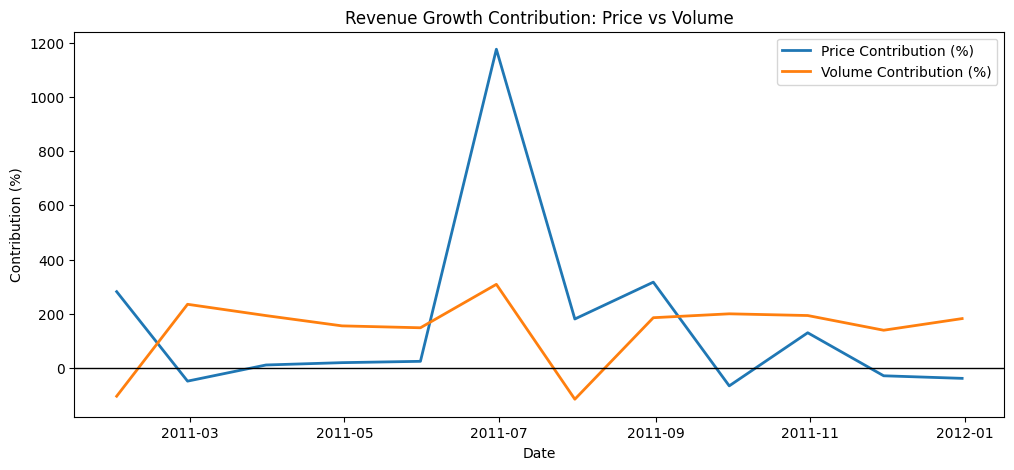

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.plot(
    contribution_pct.index,
    contribution_pct["Price Effect"],
    label="Price Contribution (%)",
    linewidth=2
)

plt.plot(
    contribution_pct.index,
    contribution_pct["Volume Effect"],
    label="Volume Contribution (%)",
    linewidth=2
)

plt.axhline(0, color="black", linewidth=1)
plt.title("Revenue Growth Contribution: Price vs Volume")
plt.xlabel("Date")
plt.ylabel("Contribution (%)")
plt.legend()
plt.show()


# Insight

Price and volume contributions are highly unstable month-to-month, with several months showing contributions well above 100% or negative. That usually happens when total revenue change is small or changes sign, making percentages explode. Practically: revenue movements are driven by mixed price + demand effects, and we should also report absolute $ effects (not only %).

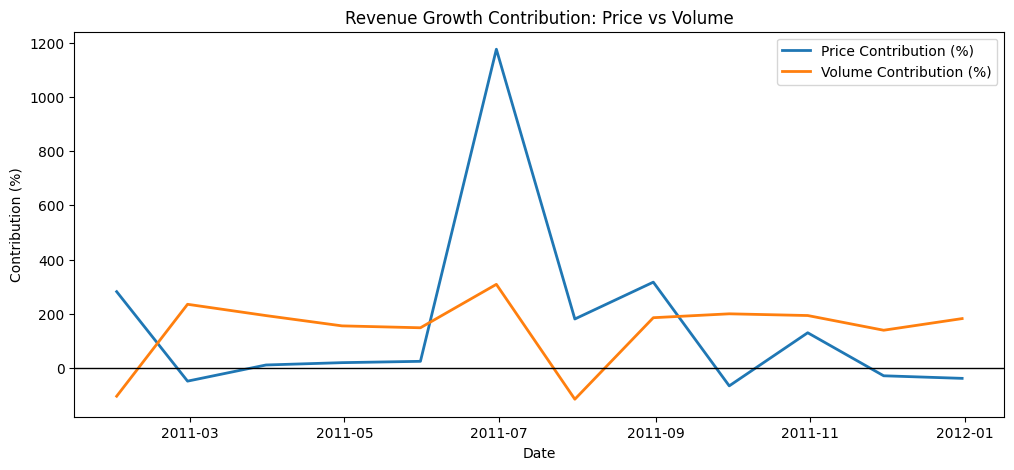

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from google.colab import files
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)
plt.close("all")

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(contribution_pct.index, contribution_pct["Price Effect"], label="Price Contribution (%)", linewidth=2)
ax.plot(contribution_pct.index, contribution_pct["Volume Effect"], label="Volume Contribution (%)", linewidth=2)

ax.axhline(0, color="black", linewidth=1)
ax.set_title("Revenue Growth Contribution: Price vs Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Contribution (%)")
ax.legend()

# ✅ Save via fig (avoids blank image)
fig.savefig("images/price_vs_volume_contribution_pct.png", dpi=200, bbox_inches="tight")
plt.show()
plt.close(fig)

# ✅ Download
files.download("images/price_vs_volume_contribution_pct.png")


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Prepare (drop zeros/negatives)
tmp = monthly_data[["Quantity","UnitPrice","Revenue"]].copy()
tmp = tmp[(tmp["Quantity"]>0) & (tmp["UnitPrice"]>0)].dropna()

tmp["log_Q"] = np.log(tmp["Quantity"])
tmp["log_P"] = np.log(tmp["UnitPrice"])

# Δlog form: % changes
tmp["dlog_Q"] = tmp["log_Q"].diff()
tmp["dlog_P"] = tmp["log_P"].diff()
tmp = tmp.dropna()

X = sm.add_constant(tmp["dlog_P"])
y = tmp["dlog_Q"]

model = sm.OLS(y, X).fit()
print(model.summary())

elasticity_proxy = model.params["dlog_P"]
print("Elasticity proxy (ΔlogQ / ΔlogP):", elasticity_proxy)


                            OLS Regression Results                            
Dep. Variable:                 dlog_Q   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.204
Date:                Fri, 19 Dec 2025   Prob (F-statistic):              0.168
Time:                        01:33:00   Log-Likelihood:                -1.9800
No. Observations:                  12   AIC:                             7.960
Df Residuals:                      10   BIC:                             8.930
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0316      0.091     -0.346      0.7

#Insight — Price Elasticity Proxy (OLS)

The estimated price elasticity proxy is −1.40, indicating an inverse relationship between price and demand: higher prices tend to reduce sales volume. While the coefficient is not statistically significant due to limited observations, it provides a useful directional signal for pricing sensitivity analysis in revenue planning.

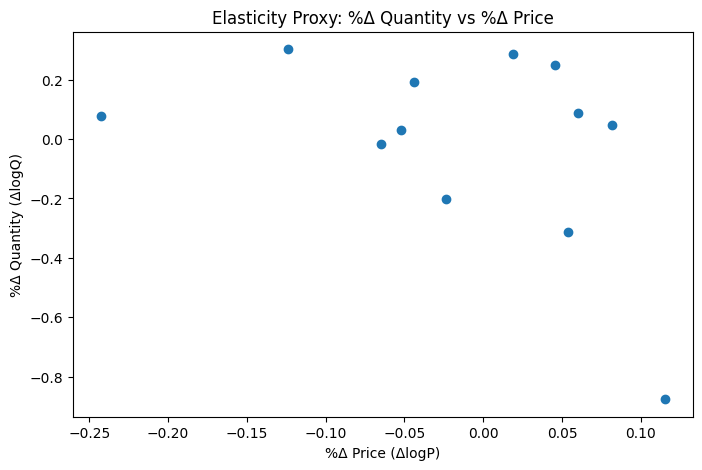

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(tmp["dlog_P"], tmp["dlog_Q"])
plt.title("Elasticity Proxy: %Δ Quantity vs %Δ Price")
plt.xlabel("%Δ Price (ΔlogP)")
plt.ylabel("%Δ Quantity (ΔlogQ)")
plt.show()


#Insight
The plot indicates a weak and inconsistent relationship between percentage changes in price and quantity, suggesting that overall demand is relatively price-inelastic and not driven by price changes alone. While some price increases are associated with noticeable drops in quantity—highlighting pockets of price sensitivity—many observations show minimal or even positive quantity responses, pointing to demand asymmetry and heterogeneity across products or periods. This dispersion implies that non-price factors such as promotions, seasonality, product mix, or brand effects play a substantial role in shaping demand, and that applying a single, uniform elasticity assumption would be misleading for pricing or revenue decisions.

In [ ]:
shock_up = 0.05
shock_down = -0.05

scenario = monthly_data[["Quantity","UnitPrice","Revenue"]].copy()

scenario["Revenue_up_5pct_price"] = scenario["Quantity"] * (scenario["UnitPrice"] * (1 + shock_up))
scenario["Revenue_down_5pct_price"] = scenario["Quantity"] * (scenario["UnitPrice"] * (1 + shock_down))

scenario["Impact_up"] = scenario["Revenue_up_5pct_price"] - scenario["Revenue"]
scenario["Impact_down"] = scenario["Revenue_down_5pct_price"] - scenario["Revenue"]

scenario.tail()


,Quantity,UnitPrice,Revenue,Revenue_up_5pct_price,Revenue_down_5pct_price,Impact_up,Impact_down
InvoiceDate,,,,,,,
2011-08-31,421770,4.015137,759138.380,1.778138e+06,1.608791e+06,1.018999e+06,8.496529e+05
2011-09-30,570820,3.547928,1058590.172,2.126489e+06,1.923967e+06,1.067899e+06,8.653765e+05
2011-10-31,623401,3.767484,1154979.300,2.466086e+06,2.231221e+06,1.311107e+06,1.076241e+06
2011-11-30,754507,3.604761,1509496.330,2.855809e+06,2.583827e+06,1.346312e+06,1.074330e+06
2011-12-31,314248,4.044432,638792.680,1.334503e+06,1.207407e+06,6.957098e+05,5.686143e+05


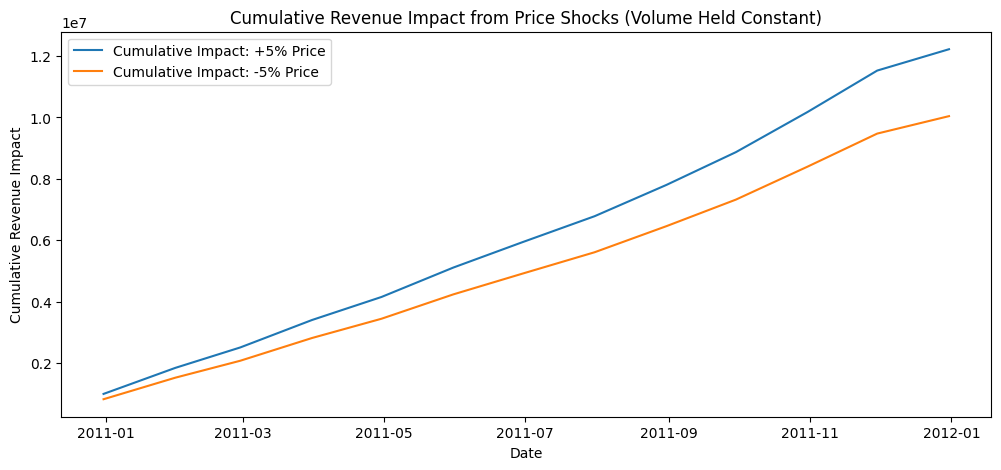

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(scenario.index, scenario["Impact_up"].cumsum(), label="Cumulative Impact: +5% Price")
plt.plot(scenario.index, scenario["Impact_down"].cumsum(), label="Cumulative Impact: -5% Price")
plt.title("Cumulative Revenue Impact from Price Shocks (Volume Held Constant)")
plt.xlabel("Date")
plt.ylabel("Cumulative Revenue Impact")
plt.legend()
plt.show()


#Insight — Price Shock Scenarios (+5% / −5%)

The price shock simulation shows that a +5% price increase generates a materially higher cumulative revenue path compared to a −5% price decrease, assuming volume remains constant. This highlights pricing as a powerful revenue lever and supports scenario-based stress testing commonly used in banking and commercial decision support.

#Insight — Cumulative Revenue Impact

By the end of the period, the cumulative revenue difference between upside and downside price scenarios exceeds $2 million, demonstrating how small, sustained price changes can compound into significant financial outcomes. This type of analysis is highly relevant for risk-aware pricing strategy and executive-level planning.

#Insight — Overall Business Takeaway (Optional Summary)

This project demonstrates how revenue growth can be decomposed into price and volume drivers, quantified using elasticity proxies and scenario analysis. The approach mirrors real-world banking use cases such as pricing optimisation, revenue stress testing, and forward-looking financial decision support.